In [1]:
import astropy
from astropy.io import fits 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.table import Table
import lightkurve as lk
from astropy.time import Time

In [2]:
file = '/Users/katborski/Documents/GitHub/AFPSC/TESS/tess2021232031932-s0042-0000000250081915-0213-a_fast-lc.fits'
data1 = astropy.io.fits.open(file)

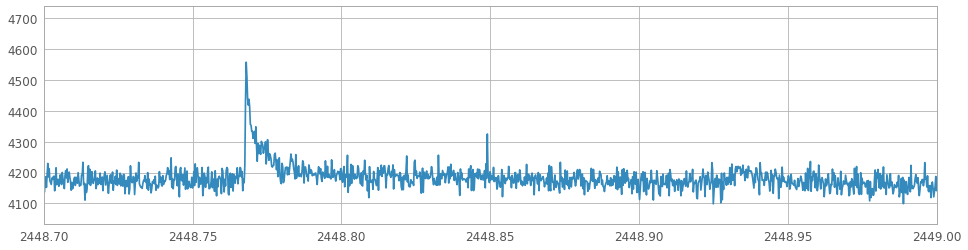

In [3]:
with fits.open(file, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

plt.figure(figsize = (16,4))
plt.xlim(2448.7,2449)
plt.plot(tess_bjds, pdcsap_fluxes)
plt.show()

In [25]:
print(tess_bjds)
type(tess_bjds)
r = np.where(np.isnan(tess_bjds))
len(tess_bjds)

[2447.68999325 2447.69022474 2447.69045624 ... 2473.1654577  2473.16568918
 2473.16592066]


110055

In [32]:
#pdcsap_fluxes
q = np.where(np.isnan(pdcsap_fluxes))
tessFLUX = [y for y in pdcsap_fluxes if np.isnan(y) == False]
len(tessFLUX)

66884

In [33]:
tess_bjds1 = list(np.delete(tess_times,q))
len(tess_bjds1)


66884

In [31]:
tess_flux = list(np.delete(pdcsap_fluxes, r))
len(tess_flux)

106050

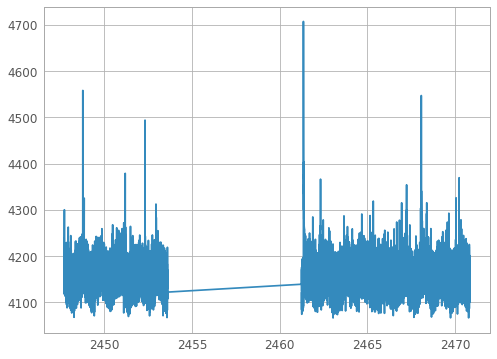

In [34]:
plt.plot(tess_bjds1,tessFLUX)

In [8]:
fits.info(file)

Filename: /Users/katborski/Documents/GitHub/AFPSC/TESS/tess2021232031932-s0042-0000000250081915-0213-a_fast-lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   110055R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


In [9]:
fits.getdata(file, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

In [10]:
with fits.open(file, mode="readonly") as hdulist:
    tess_times = hdulist[1].data['TIME']

In [11]:
#for i in x:
#    t = Time(i, format = 'plot_date')


In [12]:
tess_jd = []
for i in tess_times: 
    r = i + 2457000
#    print(r,type(r))
    tess_jd.append(r)
tessJD = [x for x in tess_jd if np.isnan(x) == False]
tessJD

[2459447.689993253,
 2459447.690224745,
 2459447.690456236,
 2459447.690687727,
 2459447.690919219,
 2459447.69115071,
 2459447.691382202,
 2459447.6916136933,
 2459447.6918451847,
 2459447.692076676,
 2459447.692308168,
 2459447.692539659,
 2459447.6927711507,
 2459447.693002642,
 2459447.6932341335,
 2459447.693465625,
 2459447.6936971163,
 2459447.6939286077,
 2459447.694160099,
 2459447.694391591,
 2459447.694623082,
 2459447.694854574,
 2459447.695086065,
 2459447.6953175566,
 2459447.695549048,
 2459447.69578054,
 2459447.696012031,
 2459447.6962435227,
 2459447.6964750136,
 2459447.6967065055,
 2459447.696937997,
 2459447.697169488,
 2459447.6974009797,
 2459447.697632471,
 2459447.6978639625,
 2459447.698095454,
 2459447.698326946,
 2459447.6985584367,
 2459447.6987899286,
 2459447.6990214195,
 2459447.6992529114,
 2459447.699484403,
 2459447.699715894,
 2459447.6999473856,
 2459447.700178877,
 2459447.7004103684,
 2459447.70064186,
 2459447.700873351,
 2459447.7011048426,
 245

In [13]:
p = Time(tessJD, format = 'jd', scale = 'utc')

In [14]:
p.format = 'iso'

In [15]:
p

<Time object: scale='utc' format='iso' value=['2021-08-21 04:33:35.417' '2021-08-21 04:33:55.418'
 '2021-08-21 04:34:15.419' ... '2021-09-15 15:58:15.545'
 '2021-09-15 15:58:35.545' '2021-09-15 15:58:55.545']>